# **Task - 02 Intermediate Level**
# **Prediction using Decision Tree Algorithm**
---

## Importing the dataset

In [1]:
import pandas as pd
dataset = pd.read_csv("Iris.csv")
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## DataSet properties

In [6]:
dataset.shape

(150, 6)

In [7]:
dataset.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
dataset.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [9]:
dataset.empty

False

In [10]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
dataset.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [13]:
dataset.describe

<bound method NDFrame.describe of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-se

In [14]:
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [15]:
print(y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

## Encoding the Dependent Variable

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [17]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Splitting the dataset into Training set and Test set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
print(X_train)

[[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]
 [5.2 2.7 3.9 1.4]
 [5.7 3.8 1.7 0.3]
 [6.  2.7 5.1 1.6]
 [5.9 3.  4.2 1.5]
 [5.8 2.6 4.  1.2]
 [6.8 3.  5.5 2.1]
 [4.7 3.2 1.3 0.2]
 [6.9 3.1 5.1 2.3]
 [5.  3.5 1.6 0.6]
 [5.4 3.7 1.5 0.2]
 [5.  2.  3.5 1. ]
 [6.5 3.  5.5 1.8]
 [6.7 3.3 5.7 2.5]
 [6.  2.2 5.  1.5]
 [6.7 2.5 5.8 1.8]
 [5.6 2.5 3.9 1.1]
 [7.7 3.  6.1 2.3]
 [6.3 3.3 4.7 1.6]
 [5.5 2.4 3.8 1.1]
 [6.3 2.7 4.9 1.8]
 [6.3 2.8 5.1 1.5]
 [4.9 2.5 4.5 1.7]
 [6.3 2.5 5.  1.9]
 [7.  3.2 4.7 1.4]
 [6.5 3.  5.2 2. ]
 [6.  3.4 4.5 1.6]
 [4.8 3.1 1.6 0.2]
 [5.8 2.7 5.1 1.9]
 [5.6 2.7 4.2 1.3]
 [5.6 2.9 3.6 1.3]
 [5.5 2.5 4.  1.3]
 [6.1 3.  4.6 1.4]
 [7.2 3.2 6.  1.8]
 [5.3 3.7 1.5 0.2]
 [4.3 3.  1.1 0.1]
 [6.4 2.7 5.3 1.9]
 [5.7 3.  4.2 1.2]
 [5.4 3.4 1.7 0.2]
 [5.7 4.4 1.5 0.4]
 [6.9 3.1 4.9 1.5]
 [4.6 3.1 1.5 0.2]
 [5.9 3.  5.1 1.8]
 [5.1 2.5 3.  1.1]
 [4.6 3.4 1.4 0.3]
 [6.2 2.2 4.5 1.5]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [4.8 3.  1.

In [20]:
print(X_test)

[[5.8 2.8 5.1 2.4]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]
 [7.3 2.9 6.3 1.8]
 [5.  3.4 1.5 0.2]
 [6.3 3.3 6.  2.5]
 [5.  3.5 1.3 0.3]
 [6.7 3.1 4.7 1.5]
 [6.8 2.8 4.8 1.4]
 [6.1 2.8 4.  1.3]
 [6.1 2.6 5.6 1.4]
 [6.4 3.2 4.5 1.5]
 [6.1 2.8 4.7 1.2]
 [6.5 2.8 4.6 1.5]
 [6.1 2.9 4.7 1.4]
 [4.9 3.1 1.5 0.1]
 [6.  2.9 4.5 1.5]
 [5.5 2.6 4.4 1.2]
 [4.8 3.  1.4 0.3]
 [5.4 3.9 1.3 0.4]
 [5.6 2.8 4.9 2. ]
 [5.6 3.  4.5 1.5]
 [4.8 3.4 1.9 0.2]
 [4.4 2.9 1.4 0.2]
 [6.2 2.8 4.8 1.8]
 [4.6 3.6 1.  0.2]
 [5.1 3.8 1.9 0.4]
 [6.2 2.9 4.3 1.3]
 [5.  2.3 3.3 1. ]
 [5.  3.4 1.6 0.4]]


In [21]:
print(y_train)

[2 1 0 2 2 1 0 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1
 2 0 0 2 1 0 0 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2
 2 0 0 0 1 1 0 0 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1
 1 1 0 0 0 2 1 2 0]


In [22]:
print(y_test)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


## Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
print(X_train)

[[ 0.61303014  0.10850105  0.94751783  0.73603967]
 [-0.56776627 -0.12400121  0.38491447  0.34808318]
 [-0.80392556  1.03851009 -1.30289562 -1.3330616 ]
 [ 0.25879121 -0.12400121  0.60995581  0.73603967]
 [ 0.61303014 -0.58900572  1.00377816  1.25331499]
 [-0.80392556 -0.82150798  0.04735245  0.21876435]
 [-0.21352735  1.73601687 -1.19037495 -1.20374277]
 [ 0.14071157 -0.82150798  0.72247648  0.47740201]
 [ 0.02263193 -0.12400121  0.21613346  0.34808318]
 [-0.09544771 -1.05401024  0.10361279 -0.03987331]
 [ 1.0853487  -0.12400121  0.94751783  1.12399616]
 [-1.39432376  0.34100331 -1.41541629 -1.3330616 ]
 [ 1.20342834  0.10850105  0.72247648  1.38263382]
 [-1.04008484  1.03851009 -1.24663528 -0.81578628]
 [-0.56776627  1.50351461 -1.30289562 -1.3330616 ]
 [-1.04008484 -2.4490238  -0.1776889  -0.29851096]
 [ 0.73110978 -0.12400121  0.94751783  0.73603967]
 [ 0.96726906  0.57350557  1.0600385   1.64127148]
 [ 0.14071157 -1.98401928  0.66621615  0.34808318]
 [ 0.96726906 -1.2865125   1.11

In [24]:
print(X_test)

[[-0.09544771 -0.58900572  0.72247648  1.51195265]
 [ 0.14071157 -1.98401928  0.10361279 -0.29851096]
 [-0.44968663  2.66602591 -1.35915595 -1.3330616 ]
 [ 1.6757469  -0.35650346  1.39760052  0.73603967]
 [-1.04008484  0.80600783 -1.30289562 -1.3330616 ]
 [ 0.49495049  0.57350557  1.22881951  1.64127148]
 [-1.04008484  1.03851009 -1.41541629 -1.20374277]
 [ 0.96726906  0.10850105  0.49743514  0.34808318]
 [ 1.0853487  -0.58900572  0.55369548  0.21876435]
 [ 0.25879121 -0.58900572  0.10361279  0.08944552]
 [ 0.25879121 -1.05401024  1.00377816  0.21876435]
 [ 0.61303014  0.34100331  0.38491447  0.34808318]
 [ 0.25879121 -0.58900572  0.49743514 -0.03987331]
 [ 0.73110978 -0.58900572  0.4411748   0.34808318]
 [ 0.25879121 -0.35650346  0.49743514  0.21876435]
 [-1.15816448  0.10850105 -1.30289562 -1.46238043]
 [ 0.14071157 -0.35650346  0.38491447  0.34808318]
 [-0.44968663 -1.05401024  0.32865413 -0.03987331]
 [-1.27624412 -0.12400121 -1.35915595 -1.20374277]
 [-0.56776627  1.96851913 -1.41

## Training Decision Tree Algorithm on the Training set

In [26]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Predicting the Test set

In [28]:
y_pred = classifier.predict(X_test)

In [29]:
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


## Visualizing the Decision Tree

[Text(0.5, 0.9166666666666666, 'Petal_Width <= -0.557\nentropy = 1.581\nsamples = 120\nvalue = [39, 37, 44]\nclass = Iris-virginica'),
 Text(0.4230769230769231, 0.75, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = Iris-setosa'),
 Text(0.5769230769230769, 0.75, 'Petal_Width <= 0.671\nentropy = 0.995\nsamples = 81\nvalue = [0, 37, 44]\nclass = Iris-virginica'),
 Text(0.3076923076923077, 0.5833333333333334, 'Petal_Length <= 0.638\nentropy = 0.469\nsamples = 40\nvalue = [0, 36, 4]\nclass = Iris-versicolor'),
 Text(0.15384615384615385, 0.4166666666666667, 'Petal_Width <= 0.542\nentropy = 0.187\nsamples = 35\nvalue = [0, 34, 1]\nclass = Iris-versicolor'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = Iris-versicolor'),
 Text(0.23076923076923078, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(0.46153846153846156, 0.4166666666666667, 'Petal_Width <= 0.413\nentropy = 0.971\nsamples = 5\nvalue = [0, 2,

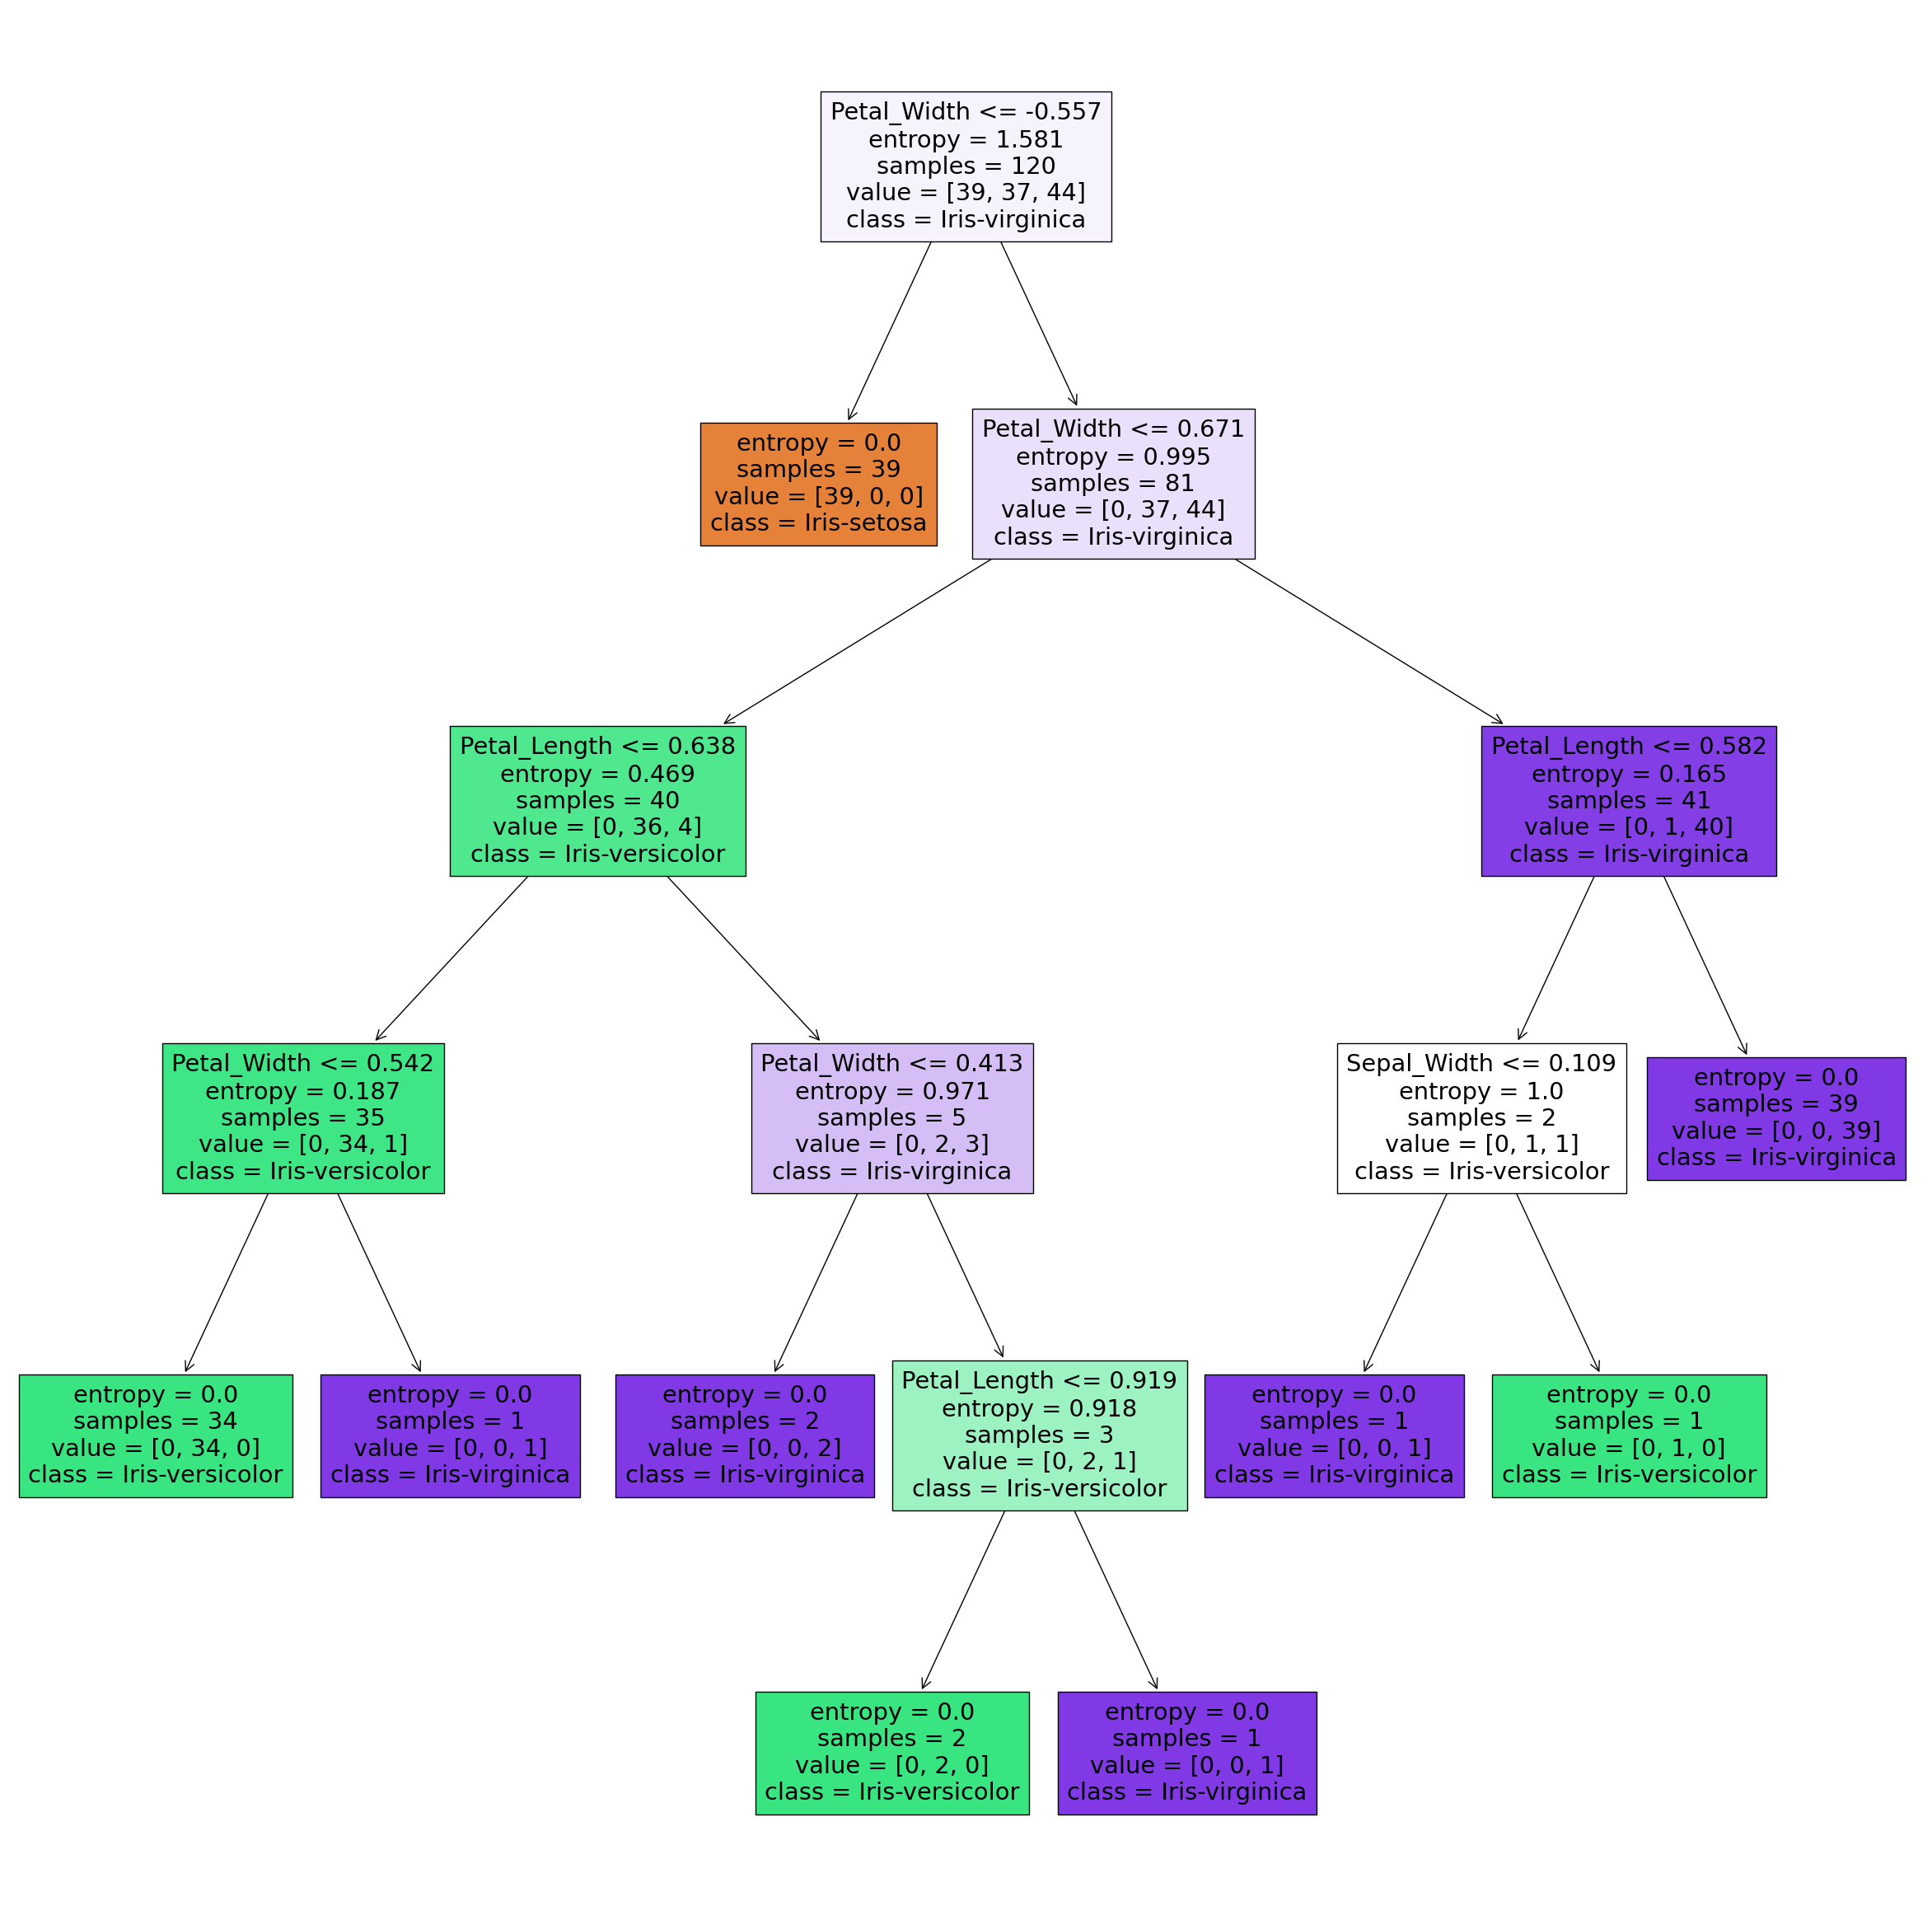

In [34]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
features = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','something_else']
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
plt.figure(figsize = (30, 30))
plot_tree(classifier, feature_names = features, class_names = classes, filled = True)

## Making the Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(y_test, y_pred)
print(cf)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [33]:
accuracy_score(y_test, y_pred)

1.0